In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, attrs={"class": "wikitable collapsible collapsed"}, thousands=".", decimal=",")
fertility_tab = tables[3]



In [4]:
#source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
#df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
#df = df.head()
#print(df)

In [5]:
#Вивести перші рядки таблиці за допомогою методу head
fertility_tab.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [6]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print("table size:", fertility_tab.shape)


table size: (28, 9)


In [7]:
#Замініть у таблиці значення "—" на значення NaN
fertility_tab_new = fertility_tab.replace("—", np.nan)
fertility_tab_new.head(10)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


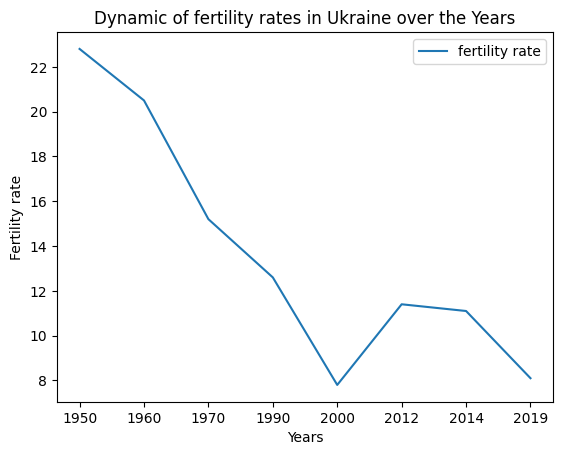

In [29]:
import matplotlib.pyplot as plt

ukraine_row = fertility_tab_new.iloc[-1,1:]
ukraine_row
ukraine_row.plot(kind ='line', label = "fertility rate")

plt.title("Dynamic of fertility rates in Ukraine over the Years")
plt.xlabel("Years")
plt.ylabel("Fertility rate")
plt.legend()
plt.show()

In [8]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
fertility_tab_new.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [9]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
fertility_tab_new[["2014", "2019"]] = fertility_tab_new[["2014", "2019"]].apply(pd.to_numeric)
fertility_tab_new.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [10]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values = fertility_tab_new.isnull().sum()
rows = len(fertility_tab_new)

share = ((missing_values/rows)*100).round(2).apply(lambda x: f"{x}%")

print("missing values of each columns: ", "\n", missing_values, "\n")
print("total number of rows:", rows, "\n")
print("share: ","\n", share)

missing values of each columns:  
 Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64 

total number of rows: 28 

share:  
 Регіон      0.0%
1950       7.14%
1960       3.57%
1970       3.57%
1990        0.0%
2000        0.0%
2012        0.0%
2014       7.14%
2019      14.29%
dtype: object


In [11]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
without_last_row = fertility_tab.drop(index=27)
without_last_row = without_last_row.iloc[23:]

print(without_last_row)

          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0     —     —


In [12]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
for column in fertility_tab_new.columns[1:]:
    #if pd.api.types.is_numeric_dtype(fertility_tab_new[column]):
    fertility_tab_new[column] = fertility_tab_new[column].fillna(fertility_tab_new[column].mean()).round(1)
print(fertility_tab_new.head(10))


              Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0               Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1          Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2          Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3   Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4           Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5        Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6       Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7         Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8  Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9           Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0


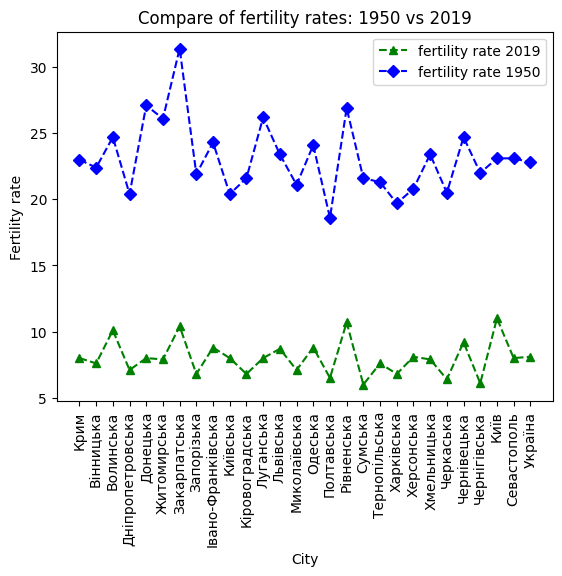

In [45]:
import matplotlib.pyplot as plt
data_2019_1 = fertility_tab_new["Регіон"]
data_2019_2 = fertility_tab_new["2019"]

data_1950_1 = fertility_tab_new["Регіон"]
data_1950_2 = fertility_tab_new["1950"]

plt.plot(data_2019_1,data_2019_2, linestyle="--", color="green", label="fertility rate 2019", marker="^")
plt.plot(data_1950_1,data_1950_2, linestyle="--", color="blue", label="fertility rate 1950", marker="D")

plt.xlabel("City")
plt.ylabel("Fertility rate")
plt.title("Compare of fertility rates: 1950 vs 2019")
plt.legend()
plt.xticks(rotation=90)
plt.show()

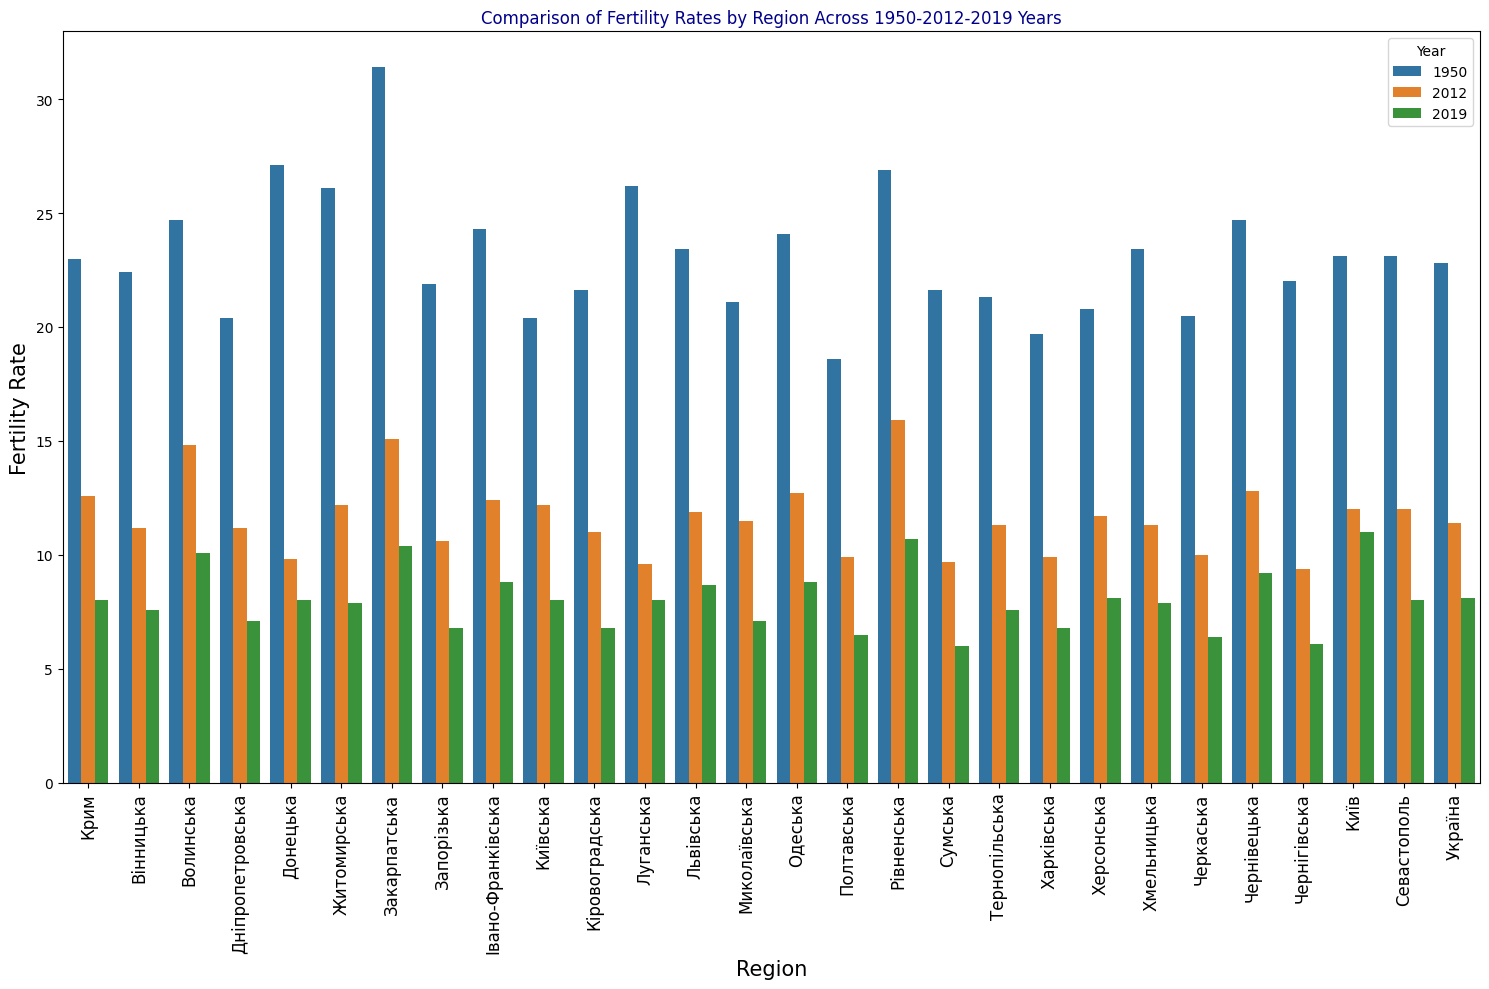

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Reshape the dataframe from wide to long format
fertility_long = fertility_tab_new.melt(id_vars=["Регіон"], 
                                        value_vars=["1950", "2012", "2019"], 
                                        var_name="Year", 
                                        value_name="Fertility Rate")

# Create a bar plot with countries on the x-axis and fertility rates on the y-axis
plt.figure(figsize=(15,10))
sns.barplot(data=fertility_long, x="Регіон", y="Fertility Rate", hue="Year", palette='tab10')

# Customize the plot
plt.xlabel("Region", fontsize="15")
plt.ylabel("Fertility Rate", fontsize="15")
plt.title("Comparison of Fertility Rates by Region Across 1950-2012-2019 Years", fontsize="12", color="darkblue")
plt.xticks(rotation=90, fontsize="12")
plt.legend(title="Year")

plt.tight_layout()
plt.show()



In [13]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avrg_ukr_rate = fertility_tab_new.drop(columns = "Регіон").mean().round(3)["2019"]

print("mean_Ukraine: ", avrg_ukr_rate, "\n")

above_avarage_2019 = fertility_tab_new[fertility_tab_new["2019"] > avrg_ukr_rate]['Регіон']
print("Regions from 2019 which meet the target: ")
above_avarage_2019

mean_Ukraine:  8.018 

Regions from 2019 which meet the target: 


2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
27              Україна
Name: Регіон, dtype: object

In [14]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_fertil_indx_2014 = fertility_tab_new["2014"].idxmax()
fertility_tab_new.loc[max_fertil_indx_2014, "Регіон"]

'Рівненська'

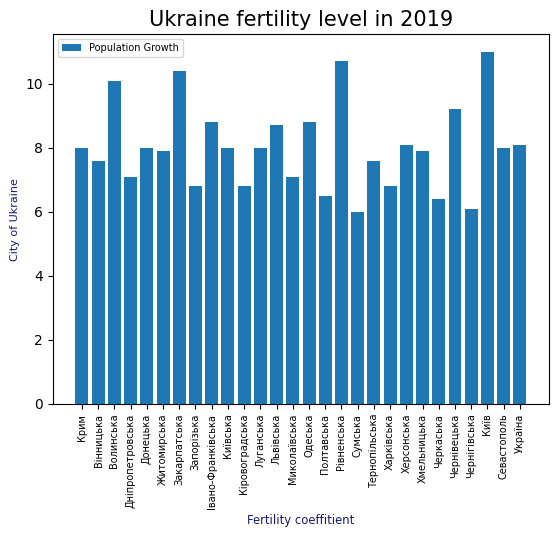

In [15]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

plt.bar(fertility_tab_new.iloc[:, 0], fertility_tab_new["2019"], label="Population Growth")
plt.xlabel("Fertility coeffitient", fontsize="small", color="midnightblue")
plt.ylabel("City of Ukraine", fontsize="8", color="midnightblue")
plt.title("Ukraine fertility level in 2019", fontsize=15, color="black")
plt.legend(fontsize = "7")
plt.xticks(rotation=90, fontsize="7")
plt.show()